In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier ,ExtraTreesClassifier ,AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier 
from lightgbm import LGBMClassifier

# Read Data

In [179]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


<Axes: xlabel='Target'>

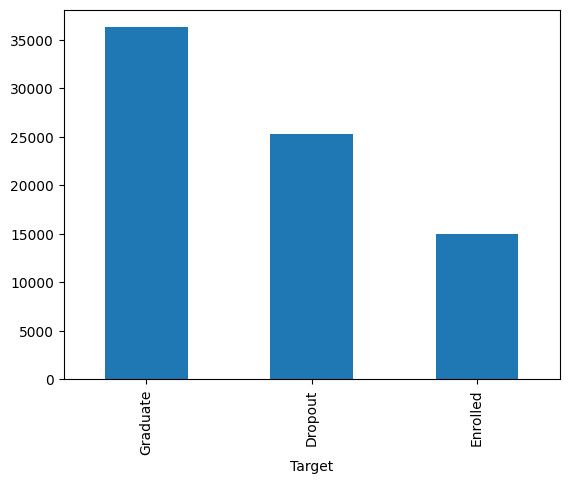

In [180]:
df_train.Target.value_counts().plot(kind='bar')

In [181]:
OE = OrdinalEncoder()
df_train['Target'] = OE.fit_transform(df_train[['Target']])

In [182]:
print(df_train.isnull().sum())
print(f'Duplicates : {df_train.duplicated().sum()}')

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

<Axes: >

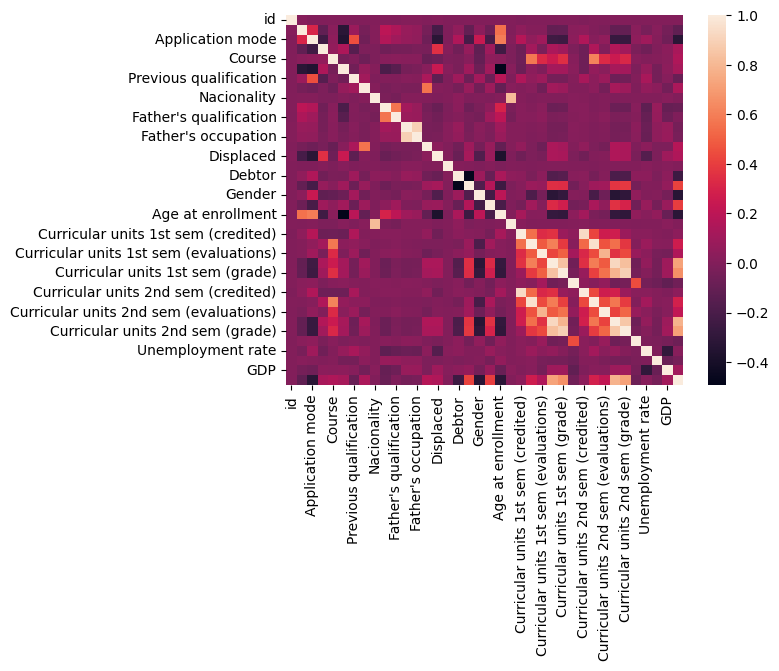

In [183]:
sns.heatmap(df_train.corr())

In [184]:
df_train.corr()['Target'].sort_values(ascending=False)

Target                                            1.000000
Curricular units 2nd sem (approved)               0.781452
Curricular units 1st sem (approved)               0.725490
Curricular units 2nd sem (grade)                  0.719036
Curricular units 1st sem (grade)                  0.661355
Tuition fees up to date                           0.415691
Scholarship holder                                0.394124
Curricular units 2nd sem (enrolled)               0.289165
Curricular units 1st sem (enrolled)               0.263657
Curricular units 2nd sem (evaluations)            0.214951
Admission grade                                   0.172880
Course                                            0.154208
Curricular units 1st sem (evaluations)            0.152398
Displaced                                         0.150066
Previous qualification (grade)                    0.138119
Application order                                 0.128394
Daytime/evening attendance                        0.1244

# Model Test

In [185]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBRFClassifier': XGBRFClassifier(),
    'CatBoostClassifier': CatBoostClassifier(verbose=0),
    'LGBMClassifier': LGBMClassifier()
}

## Feature Selection

In [186]:
X = df_train.drop(['id','Target'], axis=1).to_numpy()
y = df_train['Target'].to_numpy()

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
results=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })

results_df = pd.DataFrame(results)

c:\Users\abdel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\abdel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1374
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 36
[LightGBM] [Info] Start training from score -1.105333
[LightGBM] [Info] Start training from score -1.635907
[LightGBM] [Info] Start training from score -0.746287


## Result

In [189]:
results_df

,Model,Train Score,Test Score,Accuracy Score
0,LogisticRegression,0.788414,0.792734,0.792734
1,DecisionTreeClassifier,1.000000,0.740852,0.740852
2,RandomForestClassifier,0.999984,0.827300,0.827300
3,BaggingClassifier,0.989659,0.808677,0.808677
4,ExtraTreesClassifier,1.000000,0.824882,0.824882
5,AdaBoostClassifier,0.819028,0.819459,0.819459
6,XGBRFClassifier,0.818179,0.815930,0.815930
7,CatBoostClassifier,0.862760,0.835141,0.835141
8,LGBMClassifier,0.850279,0.833573,0.833573


In [190]:
test = df_test.drop(columns=['id'])

# Best Model Selected

In [191]:
modelCat = CatBoostClassifier()
modelCat.fit(X_train, y_train)
y_pred = model.predict(test)

In [192]:
def names(col):
    if col == 0:
        return 'Dropout'
    if col == 1:
        return 'Enrolled'
    if col == 2:
        return 'Graduate'


# Submission

In [193]:

submission_df = pd.DataFrame({
    'id': df_test['id'],  
    'Target': y_pred  
})
submission_df['Target']=submission_df['Target'].apply(names)
submission_df.to_csv('submission1.csv', index=False)